In [17]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('data_regression/Health_insurance.csv', ',')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


I will predict the medical expanses:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We will show all the columns in graph so it will be easy to see the distribution

In [12]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [18]:
age_dis = px.histogram(df, 
    x='age', 
    marginal='box', 
    nbins=47, 
    title='Distribution of Age')
age_dis.update_layout(bargap=0.1)
age_dis.show()

In [19]:
BMI_dis = px.histogram(df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
BMI_dis.update_layout(bargap=0.1)
BMI_dis.show()

In [28]:
smoker_dis = px.histogram(df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['red', 'grey'], 
                   title='Annual Medical Charges')
smoker_dis.update_layout(bargap=0.1)
smoker_dis.show()

In [29]:
sex_dis = px.histogram(df,
                   x = 'charges',
                   color = 'sex',
                   color_discrete_sequence = ["purple","red"],
                   title = 'Different charges over genders'
               
)
sex_dis.update_layout(bargap=0.1)
sex_dis.show()

In [25]:
all_dis = px.histogram(df,
                  x = "charges",
                  marginal = 'box', 
                  color="region",
                  title = "charges over different regions of U.S.A")
all_dis.update_layout(bargap=0.1)
all_dis.show()

In [30]:
df.smoker.value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

In [32]:
px.histogram(df, x='smoker', color='sex', title='Smoker')


In [37]:
all_dis = px.histogram(df, 
    x = 'charges',
    marginal ="box",
    color = 'children',
    title = 'charges incurred by children')
all_dis.update_layout(bargap=0.1)
all_dis.show()

In [41]:
all_dis = px.scatter(df, 
    x = 'age',
    y = 'charges',
    color = 'smoker',
    opacity=0.8, 
    hover_data=['sex'], 
    title='Age vs. Charges')
all_dis.update_traces(marker_size=5)
all_dis.show()

In [42]:
all_dis = px.scatter(df, 
    x = 'bmi',
    y = 'charges',
    color = 'smoker',
    opacity=0.8, 
    hover_data=['sex'], 
    title='BMI vs. Charges')
all_dis.update_traces(marker_size=5)
all_dis.show()

In [44]:
px.violin(df,x = 'children',y = 'charges')


<AxesSubplot:xlabel='sex', ylabel='charges'>

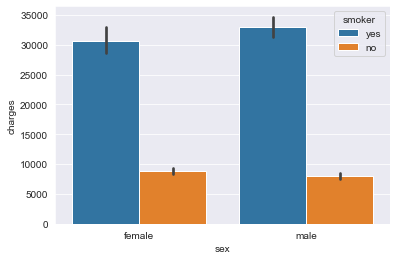

In [49]:
sns.barplot(data = df,x = 'sex',y = 'charges',hue = "smoker")


In [51]:
px.histogram(df,x='sex',y = 'charges',color = 'region')


In [52]:
df.charges.corr(df.age)

0.2990081933306476

In [53]:
df.charges.corr(df.bmi)

0.1983409688336288

In [54]:
df.children.corr(df.charges)

0.06799822684790471

In [57]:
smoker_values = {
    'no' : 0,
    'yes' : 1
}
smoker_number = df.smoker.map(smoker_values)
df.charges.corr(smoker_number)

0.7872514304984785

In [60]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

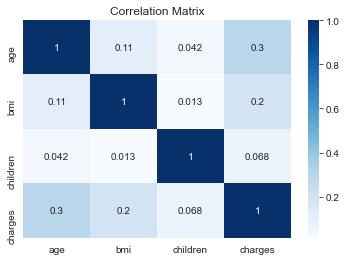

In [61]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix')

In [62]:
non_smoker_df = df[df.smoker=='no']

<AxesSubplot:title={'center':'Age vs. Charges'}, xlabel='age', ylabel='charges'>

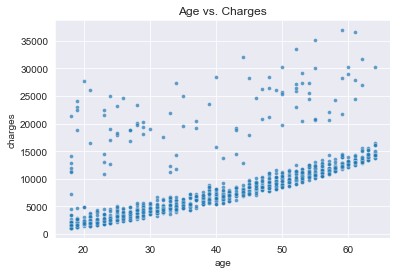

In [63]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)